In [ ]:
#importing libraries

In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

import nltk

In [5]:
%%time
df=pd.read_csv('wiki_movie_plots_deduped_cleaned_genre.csv')

Wall time: 1.32 s


In [6]:
df['Plot']

0        A bartender is working at a saloon, serving dr...
1        The moon, painted with a smiling face hangs ov...
2        The film, just over a minute long, is composed...
3        Lasting just 61 seconds and consisting of two ...
4        The earliest known adaptation of the classic f...
                               ...                        
41656    The film begins in 1919, just after World War ...
41657    Two musicians, Salih and Gürkan, described the...
41658    Zafer, a sailor living with his mother Döndü i...
41659    The film centres around a young woman named Am...
41660    The writer Orhan Şahin returns to İstanbul aft...
Name: Plot, Length: 41661, dtype: object

In [7]:
df['Plot'][3233]

'Mr Moto arrives in Puerto Rico to investigate the murder of an American agent and uncovers a smuggling ring.'

### List of punctuations

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Functions for cleaning the data

In [44]:
def remove_punctuation(text):
    return ''.join([words.lower() for words in text if words not in string.punctuation])


def tokenization(text):
    return nltk.tokenize.word_tokenize(text)


stopwords = nltk.corpus.stopwords.words('english')
def stopwards(words):
    return [i for i in words if i not in stopwords]

lemma= nltk.WordNetLemmatizer()

def lemmatization(words):
    return ' '.join([lemma.lemmatize(word) for word in words])


def replace_year(x):
    l=re.findall("\d{4}", x)
    for i in l:
        x=x.replace(i, 'wxyz')
    return x

### Cleaning the PLOT's

In [45]:
replace_dict={
    "\r": " ",
    "\n":" ",
}

for key,items in replace_dict.items():
    df['Plot']= df['Plot'].str.replace(key,items)
    
    
df['Plot_1'] = df['Plot'].apply(lambda x: replace_year(x))

In [12]:
#%%time
#df['Plot_1']=df['Plot_1'].apply(lambda x: re.sub(r'[0-9]', ' ',x))

### Removing the Punctations and Numbers

In [47]:
%%time
df['plot_without_punct']=df['Plot_1'].apply(lambda x: re.sub(r'[0-9]', '',x)).apply(lambda x: remove_punctuation(x))

Wall time: 42.1 s


### Tokenizing the words

In [48]:
%%time
df['plot_tokenized']=df['plot_without_punct'].apply(lambda x: tokenization(x))

Wall time: 1min 45s


### Removing the Stopwords

In [49]:
%%time 
df['plot_tokenized_removed_sw']=df['plot_tokenized'].apply(lambda x: stopwards(x))

Wall time: 41.4 s


### Lemmatization

In [50]:
%%time 
df['plot_lemma']=df['plot_tokenized_removed_sw'].apply(lambda x: lemmatization(x))

Wall time: 56.3 s


In [51]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Genre_updated,Plot_1,plot_without_punct,plot_tokenized,plot_tokenized_removed_sw,plot_lemma
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",NaN,"A bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...,"[a, bartender, is, working, at, a, saloon, ser...","[bartender, working, saloon, serving, drinks, ...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",NaN,"The moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...,"[the, moon, painted, with, a, smiling, face, h...","[moon, painted, smiling, face, hangs, park, ni...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",NaN,"The film, just over a minute long, is composed...",the film just over a minute long is composed o...,"[the, film, just, over, a, minute, long, is, c...","[film, minute, long, composed, two, shots, fir...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,NaN,Lasting just 61 seconds and consisting of two ...,lasting just seconds and consisting of two sh...,"[lasting, just, seconds, and, consisting, of, ...","[lasting, seconds, consisting, two, shots, fir...",lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,NaN,The earliest known adaptation of the classic f...,the earliest known adaptation of the classic f...,"[the, earliest, known, adaptation, of, the, cl...","[earliest, known, adaptation, classic, fairyta...",earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41656,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",NaN,"The film begins in wxyz, just after World War ...",the film begins in wxyz just after world war i...,"[the, film, begins, in, wxyz, just, after, wor...","[film, begins, wxyz, world, war, ended, centre...",film begin wxyz world war ended centre around ...
41657,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",comedy,"Two musicians, Salih and Gürkan, described the...",two musicians salih and gürkan described the a...,"[two, musicians, salih, and, gürkan, described...","[two, musicians, salih, gürkan, described, adv...",two musician salih gürkan described adventure ...
41658,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",comedy,"Zafer, a sailor living with his mother Döndü i...",zafer a sailor living with his mother döndü in...,"[zafer, a, sailor, living, with, his, mother, ...","[zafer, sailor, living, mother, döndü, coastal...",zafer sailor living mother döndü coastal villa...
41659,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,comedy,The film centres around a young woman named A

### Selecting the dersired columns

In [52]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Genre_updated', 'Plot_1',
       'plot_without_punct', 'plot_tokenized', 'plot_tokenized_removed_sw',
       'plot_lemma'],
      dtype='object')

In [53]:
df=df[['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre','Genre_updated', 'Wiki Page', 'Plot', 'plot_lemma']]

In [54]:
df.rename(columns={'plot_lemma': 'Plot_cleanned'},inplace=True)

In [55]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Genre_updated,Wiki Page,Plot,Plot_cleanned
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,NaN,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,NaN,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,NaN,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...
41656,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,NaN,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",film begin wxyz world war ended centre around ...
41657,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",two musician salih gürkan described adventure ...
41658,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",zafer sailor living mother döndü coastal villa...
41659,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,film centre around young woman named amy tyler...


In [56]:
df.to_csv('wiki_movie_plots_deduped_cleaned_genre_and_plot.csv',index=False)

In [57]:
data=df[['Plot','Plot_cleanned','Genre_updated']]

In [58]:
data['Len_of_Plot']=data['Plot_cleanned'].apply(lambda x: len(x))

In [59]:
max(data['Len_of_Plot'])

23062

In [60]:
import matplotlib.pyplot as plt

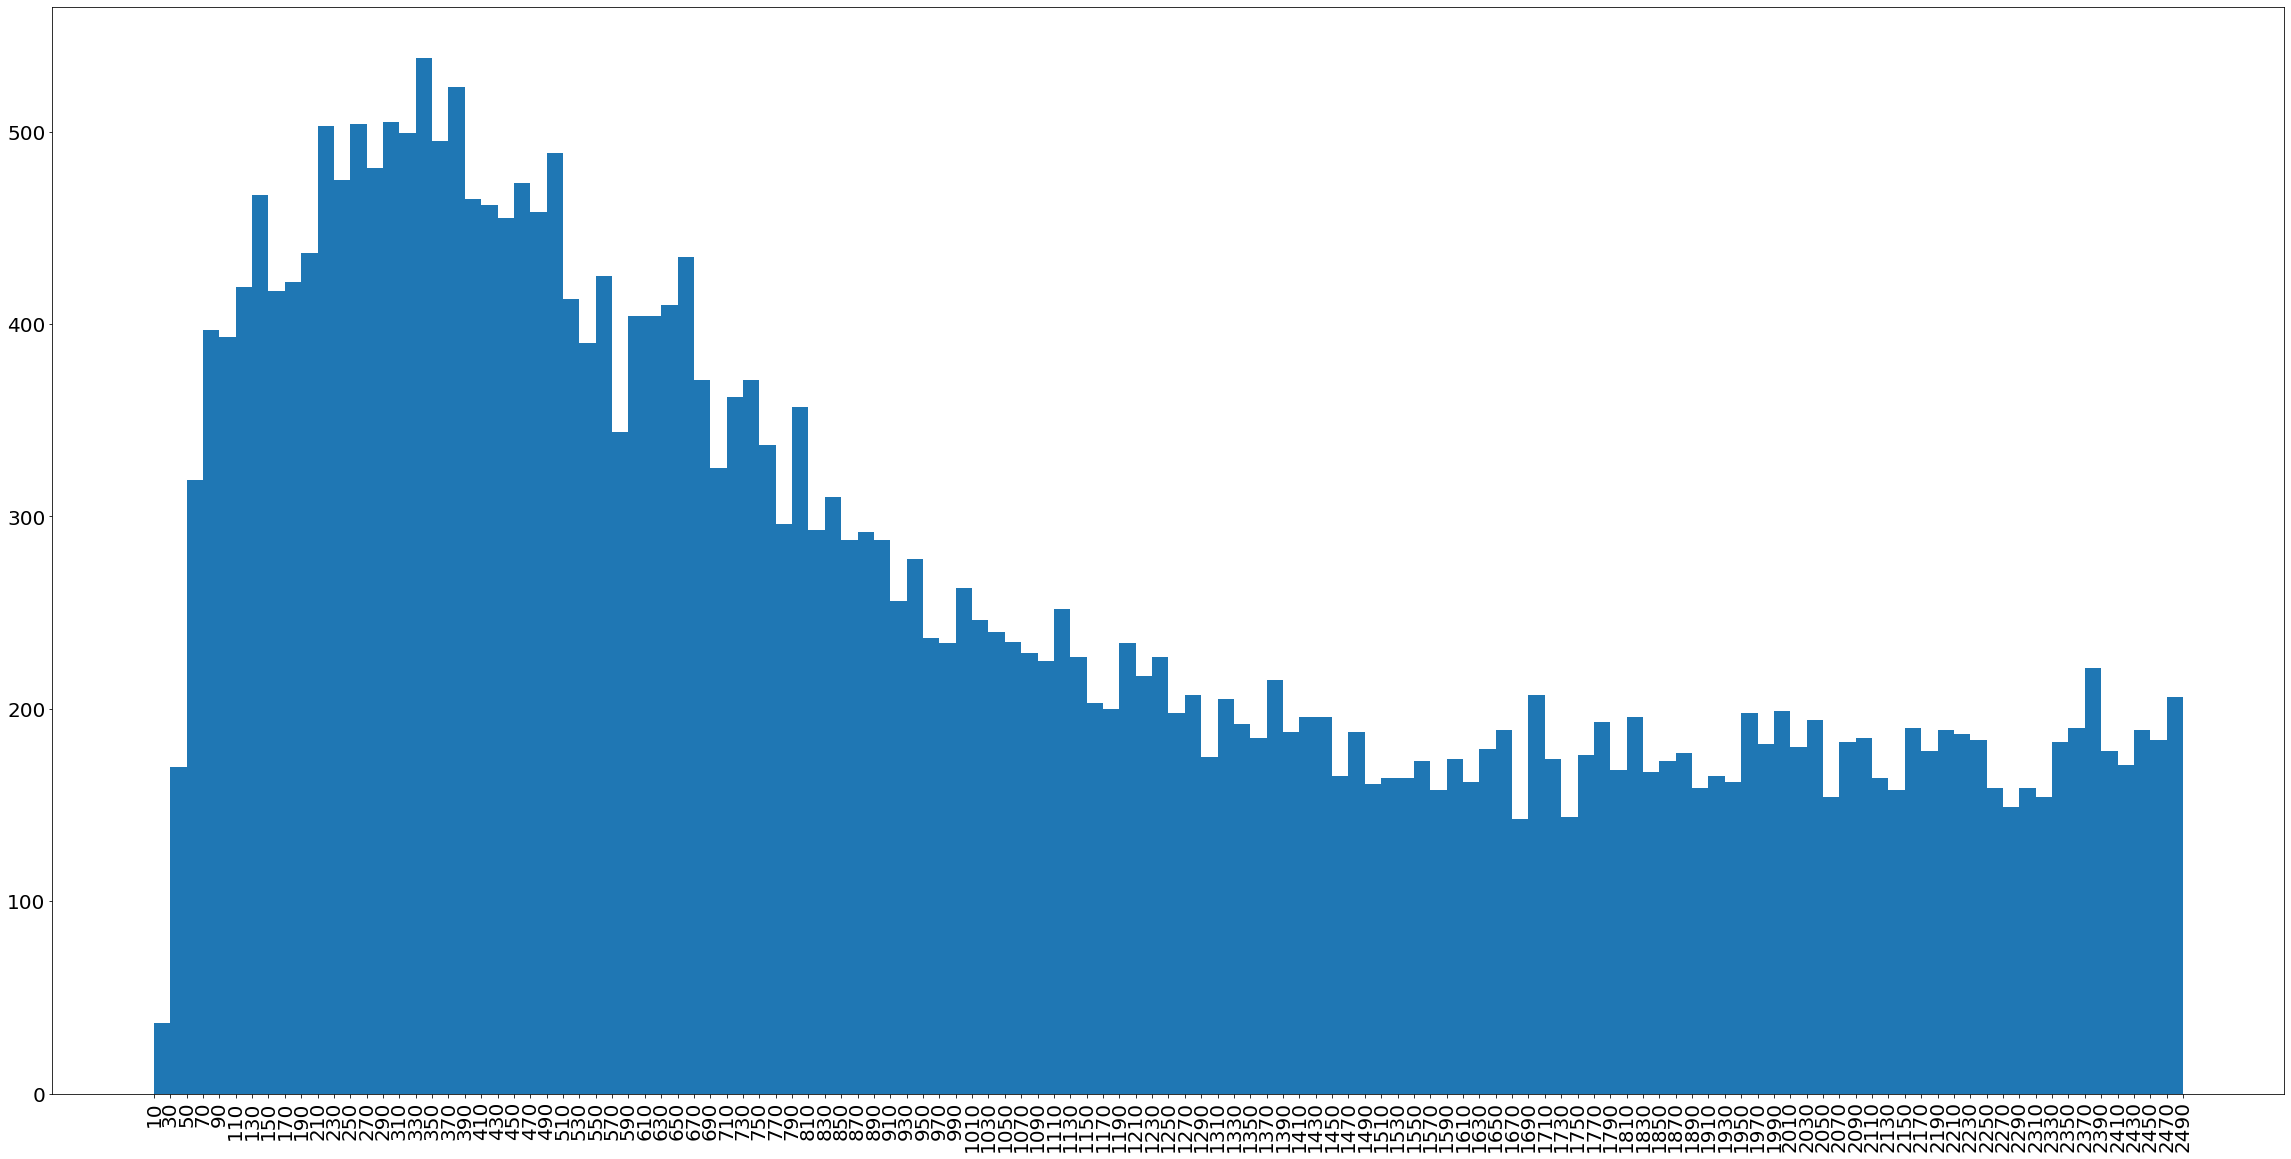

In [61]:
bins= [i for i in range(10,2500,20)]
plt.rcParams["figure.figsize"] = (40,20)
plt.hist(data['Len_of_Plot'], bins=bins)
plt.xticks(bins,size=20,rotation=90)
plt.yticks(size=20)
plt.show() 
